In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model

In [6]:
ruta = "C:/Users/dario/OneDrive/Escritorio/Unab/Inferencia y Patrones/bajoPeso.txt"
df = pd.read_csv(ruta, sep="\s+", header = 0)
df.head()

<>:2: SyntaxWarning: invalid escape sequence '\s'
<>:2: SyntaxWarning: invalid escape sequence '\s'
C:\Users\dario\AppData\Local\Temp\ipykernel_1860\1489380456.py:2: SyntaxWarning: invalid escape sequence '\s'
  df = pd.read_csv(ruta, sep="\s+", header = 0)


,presSist,edadG,apgar5,varon
0,78,29,7,0
1,69,31,8,0
2,43,33,0,1
3,65,31,8,0
4,67,30,7,1


In [8]:
Apgar = df[["apgar5"]]
Apgar.head()

,apgar5
0,7
1,8
2,0
3,8
4,7


In [11]:
PreSist = df[["presSist"]]
PreSist.head()

,presSist
0,78
1,69
2,43
3,65
4,67


Text(0, 0.5, 'Presion Sistolica')

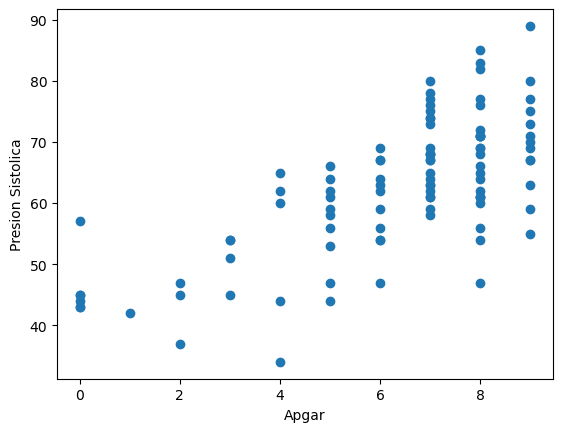

In [16]:
plt.scatter(Apgar, PreSist)
plt.xlabel("Apgar")
plt.ylabel("Presion Sistolica")

In [17]:
#Redefinimos las variables explicativas
X = df[["edadG","apgar5"]]
X.head()

,edadG,apgar5
0,29,7
1,31,8
2,33,0
3,31,8
4,30,7


In [18]:
y = PreSist
y.head()

,presSist
0,78
1,69
2,43
3,65
4,67


In [19]:
modelo = linear_model.LinearRegression()

In [20]:
modelo.fit(X,y)

LinearRegression()

In [22]:
import statsmodels.api as sm

# Agregar constante (intercepto)
X = sm.add_constant(X)

# Ajustar el modelo
modelo = sm.OLS(y, X).fit()

#ver resumen
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:               presSist   R-squared:                       0.550
Model:                            OLS   Adj. R-squared:                  0.541
Method:                 Least Squares   F-statistic:                     59.34
Date:                Thu, 04 Sep 2025   Prob (F-statistic):           1.48e-17
Time:                        10:34:32   Log-Likelihood:                -343.11
No. Observations:                 100   AIC:                             692.2
Df Residuals:                      97   BIC:                             700.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.6546      8.748      1.447      0.1

In [26]:
Como mi df quedó asi, debo agregar la misma cantidad de datos
X.head()


,const,edadG,apgar5
0,1.0,29,7
1,1.0,31,8
2,1.0,33,0
3,1.0,31,8
4,1.0,30,7


In [27]:
modelo.predict([[1,31,7]])

array([67.10052094])

                coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.6546      8.748      1.447      0.151      -4.708      30.017
edadG          1.0673      0.306      3.492      0.001       0.461       1.674
apgar5         3.0513      0.319      9.574      0.000       2.419       3.684

Observamos que la edadG y apgar5 son estadisticamente significativas

In [28]:
#ntervalo de confianza
modelo.conf_int(alpha = 0.05)

,0,1
const,-4.707517,30.016759
edadG,0.460702,1.673915
apgar5,2.418806,3.683859


In [33]:
#Buscar los residuos y los valores ajustados salen directos con la libreria statsmodels

valores_ajustados = modelo.fittedvalues
residuos = modelo.resid

Text(0, 0.5, 'Residuos')

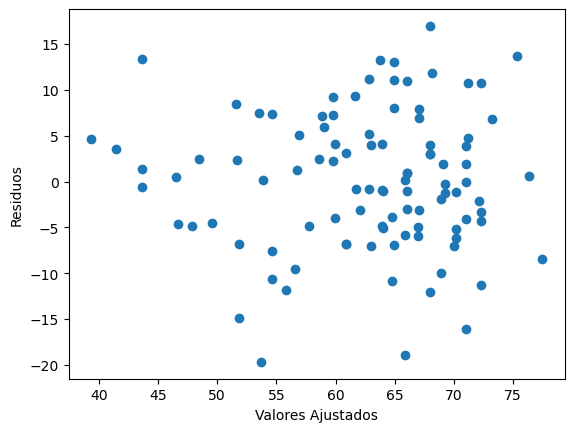

In [34]:
plt.scatter(valores_ajustados, residuos)
plt.xlabel("Valores Ajustados")
plt.ylabel("Residuos")


(array([ 3.,  1.,  7., 13., 16., 22., 15., 12.,  8.,  3.]),
 array([-19.67728815, -16.01128293, -12.34527771,  -8.67927249,
         -5.01326727,  -1.34726205,   2.31874317,   5.98474839,
          9.65075361,  13.31675883,  16.98276405]),
 <BarContainer object of 10 artists>)

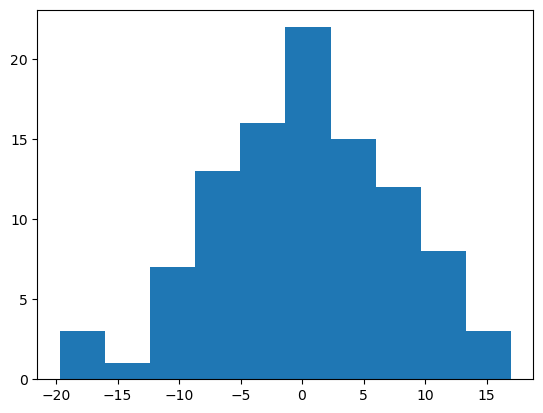

In [37]:
plt.hist(residuos)

{'whiskers': [<matplotlib.lines.Line2D at 0x24d1420a480>,
 'caps': [<matplotlib.lines.Line2D at 0x24d17b095e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x24d16c7a300>],
 'medians': [<matplotlib.lines.Line2D at 0x24d17aa3c20>],
 'fliers': [<matplotlib.lines.Line2D at 0x24d10d61310>],
 'means': []}

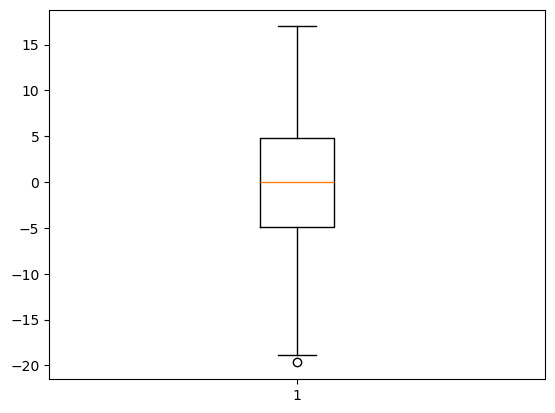

In [38]:
plt.boxplot(residuos)

¿Cual es el porcentaje de variabilidad explicado por el modelo?
R-squared:                       0.550
Adj. R-squared:                  0.541

la variable respuesta es relacional a las explicativas en un 55%
